In [2]:
import pandas as pd
import numpy as np
# all the heavy lifting is done by the sklearn
from sklearn.feature_selection import SelectFromModel,RFECV
#from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,r2_score 

In [3]:
import pandas as pd
df=pd.read_csv('C:/Users/ashav/Downloads/gym-fraud-detection-master/gym-fraud-detection-master/DrDoS_UDP.csv', nrows= 50000)

C:\Users\ashav\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df[' Source IP'])

df.drop(" Source IP", axis=1, inplace=True)
df[" Source IP"] = label


le = LabelEncoder()
label = le.fit_transform(df[' Timestamp'])

df.drop(" Timestamp", axis=1, inplace=True)
df[" Timestamp"] = label

le = LabelEncoder()
label = le.fit_transform(df[' Destination IP'])

df.drop(" Destination IP", axis=1, inplace=True)
df[" Destination IP"] = label
df


,Unnamed: 0,Flow ID,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label,Source IP,Timestamp,Destination IP
0,101418,172.16.0.5-192.168.50.1-43443-6652-17,43443,6652,17,218395,6,0,2088.0,0.0,...,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,0,0,2
1,21564,172.16.0.5-192.168.50.1-54741-9712-17,54741,9712,17,108219,4,0,1398.0,0.0,...,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,0,1,2
2,23389,172.16.0.5-192.168.50.1-56589-4680-17,56589,4680,17,104579,4,0,1438.0,0.0,...,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,0,2,2
3,48872,172.16.0.5-192.168.50.1-40233-2644-17,40233,2644,17,110967,4,0,1544.0,0.0,...,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,0,3,2
4,80354,172.16.0.5-192.168.50.1-33989-16901-17,33989,16901,17,1,2,0,766.0,0.0,...,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7578,172.16.0.5-192.168.50.1-54115-29360-17,54115,29360,17,106825,4,0,1438.0,0.0,...,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,0,49991,2
49996,108392,172.16.0.5-192.168.50.1-50297-43953-17,50297,43953,17,2,2,0,766.0,0.0,...,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,0,49992,2
49997,24301,172.16.0.5-192.168.50.1-54377-1591-17,54377,1591,17,217455,6,0,2088.0,0.0,...,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,0,49993,2
49998,926,172.16.0.5-192.168.50.1-50620-38007-17,50620,38007,17,106807,4,0,1438.0,0.0,...,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,0,49994,2


In [5]:
le = LabelEncoder()
label = le.fit_transform(df[' Label'])

df.drop(" Label", axis=1, inplace=True)
df["Label"] = label
df['Label']

0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: Label, Length: 50000, dtype: int32

In [6]:
df.drop("Flow ID", axis=1, inplace=True)
df.shape

(50000, 87)

In [7]:
df.drop("SimillarHTTP", axis=1, inplace=True)

In [8]:
df=df
df

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Source IP,Timestamp,Destination IP,Label
0,101418,43443,6652,17,218395,6,0,2088.0,0.0,393.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,2,1
1,21564,54741,9712,17,108219,4,0,1398.0,0.0,369.0,...,0.0,0.0,0.0,0.0,0.0,1,0,1,2,1
2,23389,56589,4680,17,104579,4,0,1438.0,0.0,389.0,...,0.0,0.0,0.0,0.0,0.0,1,0,2,2,1
3,48872,40233,2644,17,110967,4,0,1544.0,0.0,389.0,...,0.0,0.0,0.0,0.0,0.0,1,0,3,2,1
4,80354,33989,16901,17,1,2,0,766.0,0.0,383.0,...,0.0,0.0,0.0,0.0,0.0,1,0,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7578,54115,29360,17,106825,4,0,1438.0,0.0,389.0,...,0.0,0.0,0.0,0.0,0.0,1,0,49991,2,1
49996,108392,50297,43953,17,2,2,0,766.0,0.0,383.0,...,0.0,0.0,0.0,0.0,0.0,1,0,49992,2,1
49997,24301,54377,1591,17,217455,6,0,2088.0,0.0,393.0,...,0.0,0.0,0.0,0.0,0.0,1,0,49993,2,1
49998,926,50620,38007,17,106807,4,0,1438.0,0.0,389.0,...,0.0,0.0,0.0,0.0,0.0,1,0,49994,2,1


In [9]:
df.fillna(0)

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Source IP,Timestamp,Destination IP,Label
0,101418,43443,6652,17,218395,6,0,2088.0,0.0,393.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,2,1
1,21564,54741,9712,17,108219,4,0,1398.0,0.0,369.0,...,0.0,0.0,0.0,0.0,0.0,1,0,1,2,1
2,23389,56589,4680,17,104579,4,0,1438.0,0.0,389.0,...,0.0,0.0,0.0,0.0,0.0,1,0,2,2,1
3,48872,40233,2644,17,110967,4,0,1544.0,0.0,389.0,...,0.0,0.0,0.0,0.0,0.0,1,0,3,2,1
4,80354,33989,16901,17,1,2,0,766.0,0.0,383.0,...,0.0,0.0,0.0,0.0,0.0,1,0,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7578,54115,29360,17,106825,4,0,1438.0,0.0,389.0,...,0.0,0.0,0.0,0.0,0.0,1,0,49991,2,1
49996,108392,50297,43953,17,2,2,0,766.0,0.0,383.0,...,0.0,0.0,0.0,0.0,0.0,1,0,49992,2,1
49997,24301,54377,1591,17,217455,6,0,2088.0,0.0,393.0,...,0.0,0.0,0.0,0.0,0.0,1,0,49993,2,1
49998,926,50620,38007,17,106807,4,0,1438.0,0.0,389.0,...,0.0,0.0,0.0,0.0,0.0,1,0,49994,2,1


In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [11]:
 X = df.drop(['Label'],axis=1)
y = df['Label']
X.head(1)


,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Source IP,Timestamp,Destination IP
0,101418,43443,6652,17,218395,6,0,2088.0,0.0,393.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2


In [12]:
y

0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: Label, Length: 50000, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)


In [16]:
model = GradientBoostingClassifier()

In [17]:
pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=9999)
n_scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9999600000000001

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Feature Selection',
                 RFE(estimator=GradientBoostingClassifier(),
                     n_features_to_select=5)),
                ('Model', GradientBoostingClassifier())])

In [19]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True])

In [20]:
pd.DataFrame(rfe.support_,index=X.columns,columns=['Rank'])

,Rank
Unnamed: 0,False
Source Port,False
Destination Port,False
Protocol,False
Flow Duration,False
...,...
Idle Min,True
Inbound,False
Source IP,True
Timestamp,False


In [21]:
rf_df = pd.DataFrame(rfe.ranking_,index=X.columns, columns=['Rank']).sort_values( by='Rank', ascending=True)
rf_df

,Rank
Destination IP,1
URG Flag Count,1
Idle Max,1
Idle Min,1
Source IP,1
...,...
Subflow Bwd Packets,77
Packet Length Mean,78
Bwd PSH Flags,79
Min Packet Length,80


In [22]:
from sklearn.ensemble import RandomForestClassifier# instantiate model
model = RandomForestClassifier(n_estimators=200, random_state=0)
# fit model
model.fit(X,y)

RandomForestClassifier(n_estimators=200, random_state=0)

<AxesSubplot:>

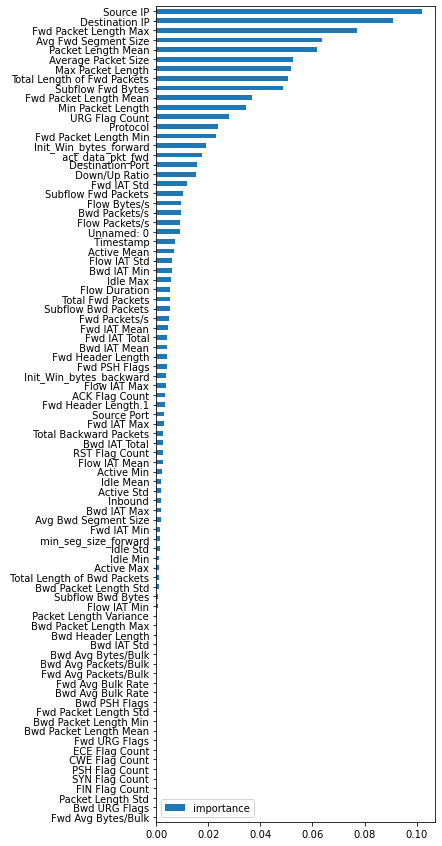

In [28]:
importances = model.feature_importances_# visualization
cols = X.columns
(pd.DataFrame(importances, cols, columns = ['importance'])
 .sort_values(by='importance', ascending=True)
 .plot(kind='barh', figsize=(5,15)))

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean decrease in impurity')

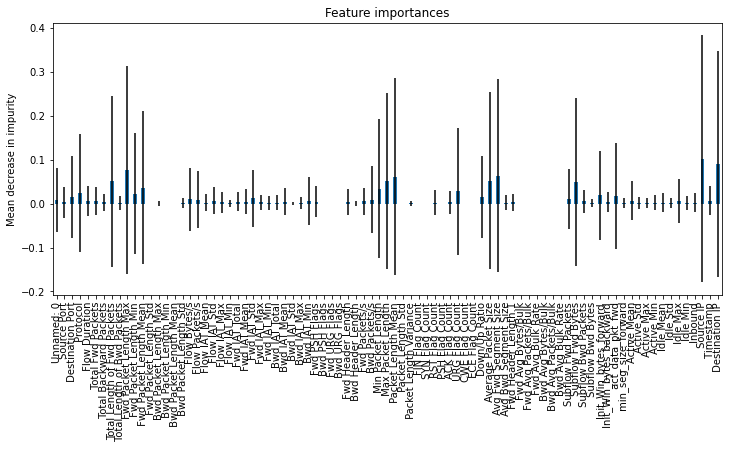

In [25]:
# calculate standard deviation of feature importances 
std = np.std([i.feature_importances_ for i in model.estimators_], axis=0)# visualization
feat_with_importance  = pd.Series(importances, X.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

array([2.39415091e-01, 1.42754102e-01, 1.27062149e-01, 9.06402548e-02,
       6.68171478e-02, 4.53360005e-02, 3.98783999e-02, 3.67328027e-02,
       3.49399934e-02, 3.36073218e-02, 3.02851169e-02, 1.91202735e-02,
       1.46668634e-02, 1.44851411e-02, 1.41293304e-02, 1.40127926e-02,
       1.33981117e-02, 1.07505270e-02, 5.36299584e-03, 3.86590717e-03,
       1.80101500e-03, 5.75186639e-04, 3.46897430e-04, 7.49794262e-06,
       4.33051403e-06, 2.49081765e-06, 8.48522210e-07, 4.62352264e-07,
       3.67047794e-07, 2.58619560e-07, 1.88985213e-07, 7.90527064e-08,
       4.19461580e-08, 1.25126415e-08, 4.20045885e-11, 2.35808758e-12,
       2.37587174e-13, 3.65322804e-32, 2.09788194e-32, 1.31180911e-32,
       9.34773760e-33, 7.65760861e-33, 5.41397656e-33, 5.27978502e-33,
       4.52220502e-33, 4.05785423e-33, 2.73800438e-33, 1.53827411e-33,
       1.53827411e-33, 1.53827411e-33, 1.53827411e-33, 1.53827411e-33,
       1.53827411e-33, 1.53827411e-33, 1.53827411e-33, 1.53827411e-33,
      

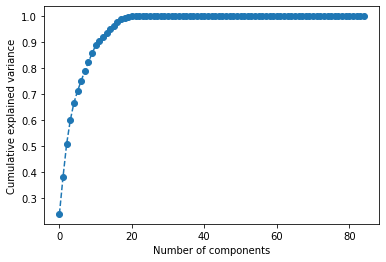

In [26]:
#PCA
#import PCA module
from sklearn.decomposition import PCA# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# fit PCA to data
pca = PCA()
pca.fit(X_scaled)
evr = pca.explained_variance_ratio_# visualizing the variance explained by each principal componentsplt.figure(figsize=(12, 5))
plt.plot(range(0, len(evr)), evr.cumsum(), marker="o", linestyle="--")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
evr